In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import pandas as pd
import numpy as np
from scipy.stats import linregress
rcParams['figure.figsize'] = 14,10
plt.style.use('ggplot')

# NY Times Data
us_counties = "covid_data/us-counties.csv"
us_states = "covid_data/us-states.csv"
us_total = "covid_data/us.csv"
counties = pd.read_csv(us_counties)
states = pd.read_csv(us_states)
us = pd.read_csv(us_total)

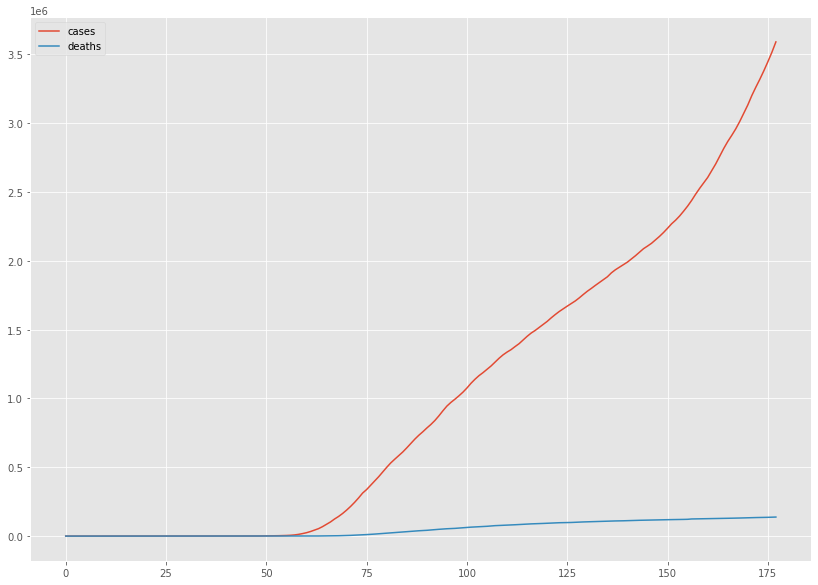

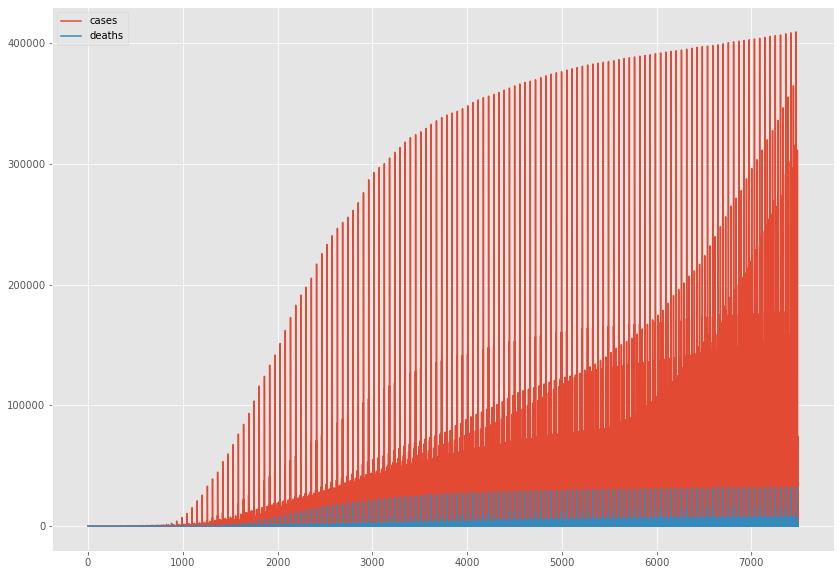

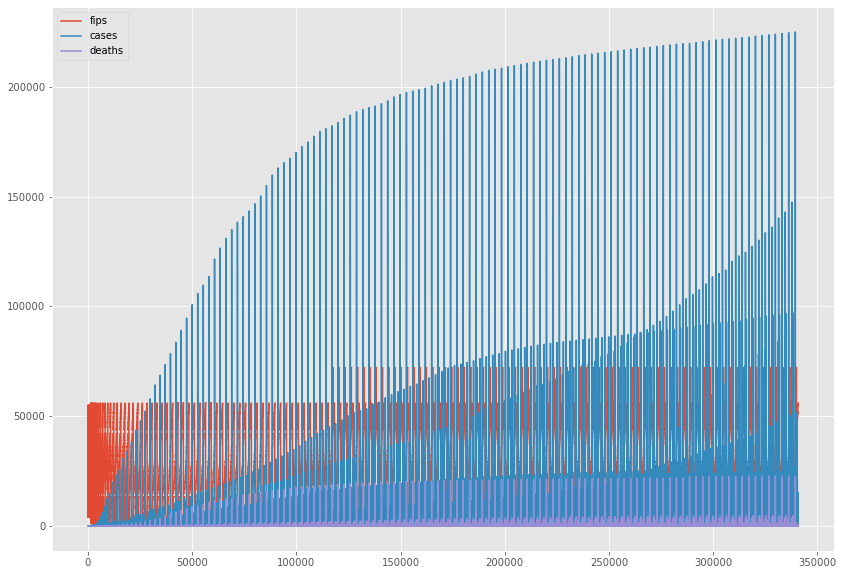

In [18]:
us.plot();
states[['date','state','cases','deaths']].plot();
counties.plot();

In [21]:
trump_data = "approval_ratings/trump_ratings.csv"
trump_ratings = pd.read_csv(trump_data)
trump_ratings['president'].value_counts()

Donald Trump    12721
Name: president, dtype: int64

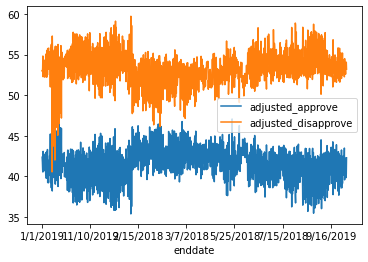

In [11]:
avg_trump_ratings =trump_ratings.groupby('enddate').agg({'adjusted_approve': 'mean', 'adjusted_disapprove': 'mean'})
avg_trump_ratings.plot();
#trump_ratings.plot(kind='line', x='enddate', y='disapprove')

In [22]:
# John's Hopkins Data
jh_data = "covid_data/time_series_covid19_deaths_US.csv"
jh_covid = pd.read_csv(jh_data)
jh_covid.drop(columns=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Lat', 'Long_', 'Combined_Key', 'Population', 'Country_Region'], inplace=True)
jh_covid.head(10)

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20
0,American Samoa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Guam,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5
2,Northern Mariana Islands,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
3,Puerto Rico,0,0,0,0,0,0,0,0,0,...,159,159,159,167,167,167,169,171,172,177
4,Virgin Islands,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
5,Alabama,0,0,0,0,0,0,0,0,0,...,12,13,14,14,15,15,17,18,19,20
6,Alabama,0,0,0,0,0,0,0,0,0,...,9,10,11,11,11,11,11,12,13,13
7,Alabama,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,3,3,3,3
8,Alabama,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,2,2,2,2
9,Alabama,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [13]:
jh_pivot = pd.pivot_table(jh_covid, index=['Province_State'], aggfunc=np.sum, fill_value=0)
jh_pivot.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/16/20,7/17/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,1230,1265,985,1006,1007,1007,1007,1033,1058,1068
Alaska,0,0,0,0,0,0,0,0,0,0,...,17,17,14,15,16,16,16,17,17,17
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,0,0,0,0,0,0,...,2492,2583,1764,1798,1817,1825,1829,1927,1963,2038
Arkansas,0,0,0,0,0,0,0,0,0,0,...,341,353,279,281,286,287,292,301,305,309
California,0,0,0,0,0,0,0,0,0,0,...,7489,7603,6265,6315,6334,6373,6441,6573,6718,6859
Colorado,0,0,0,0,0,0,0,0,0,0,...,1745,1751,1701,1701,1701,1701,1691,1696,1704,1706
Connecticut,0,0,0,0,0,0,0,0,0,0,...,4389,4396,4326,4335,4335,4335,4338,4338,4343,4348
Delaware,0,0,0,0,0,0,0,0,0,0,...,521,521,510,512,512,512,512,514,515,517
